# Credit Card Fraud Detection

## Import Packages

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.dummy import DummyClassifier

## Load the Data

In [17]:
data = pd.read_csv('creditcard.csv')
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Check for Missing Values

In [18]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Identify Fraudulent and Legitimate Transactions

In [19]:
#1 is fraud, 0 is legit
fraud = data.loc[data['Class'] == 1]
legit = data.loc[data['Class'] == 0]

In [20]:
#Number of fraudulent transactions
fraud.shape[0]

492

In [21]:
#Number of legitimate transactions
legit.shape[0]

284315

In [22]:
#Fraud rate
fraud.shape[0]/data.shape[0]

0.001727485630620034

Only .173% of the data is fraudulent, which means that the data is seriously imbalenced.

## Train - Test Split

In [23]:
#Establishing features and targets
X = data.iloc[:,0:-1]
X = X.to_numpy()

y = data['Class']

In [24]:
#Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20)

## Dummy Classifier (Baseline)

In [57]:
dc = DummyClassifier()
dc.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier()

In [62]:
y_pred_dummy = dc.predict(X_test)

In [63]:
pd.crosstab(y_test, y_pred_dummy)

col_0,0,1
Class,,
0,56765,97
1,99,1


## Logistic Regression Model

In [72]:
#Fitting the regression
lr = LogisticRegression(max_iter = 360)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=360)

In [73]:
#Storing the predicted values from the model in y_pred
y_pred = lr.predict(X_test)

In [74]:
#Shows how accurate the model was.
accuracy_score(y_test, y_pred)

0.9991046662687406

In [75]:
#Area under ROC curve
roc_auc_score(y_test, y_pred)

0.8148768949386233

In [76]:
#Confusion Matrix
pd.crosstab(y_test, y_pred)

col_0,0,1
Class,,
0,56848,14
1,37,63


The results of these tests are all quite different, which is in part to imbalanced nature of the dataset. To get a more accurate result we can conduct oversampling or SMOTE (Synthetic Minority Oversampling Technique) to combat the imbalanced data.

## SMOTE 

In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [32]:
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [33]:
from collections import Counter

In [34]:
print('Before SMOTE: ', Counter(y_train))
print('Before SMOTE: ', Counter(y_train_smote))

Before SMOTE:  Counter({0: 227453, 1: 392})
Before SMOTE:  Counter({0: 227453, 1: 227453})


## Logistic Regression with SMOTE Training Data

In [77]:
#Fitting regression with new balanced data
lr_smote = LogisticRegression(max_iter = 200)
lr_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=200)

In [78]:
#Predicted outputs for test dataset
y_pred_smote = lr_smote.predict(X_test)

In [79]:
#Confusion Matrix
pd.crosstab(y_test, y_pred_smote)

col_0,0,1
Class,,
0,55747,1115
1,12,88


In [80]:
accuracy_score(y_test, y_pred_smote)

0.9802148800955023

## Naive Bayes with SMOTE Training Data

In [40]:
#Fitting model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_smote, y_train_smote)

GaussianNB()

In [41]:
#Predicted outputs for test inputs
y_pred_nb = nb.predict(X_test)

#Confusion Matrix
pd.crosstab(y_test, y_pred_nb)

col_0,0,1
Class,,
0,56443,419
1,25,75


In [42]:
accuracy_score(y_test, y_pred_nb)

0.9922053298690355

## Plotting ROC Curves

In [64]:
#Estimated Probabilities
dc_probs = dc.predict_proba(X_test)[:,1]
lr_probs = logit_smote.predict_proba(X_test)[:,1]
nb_probs = nb.predict_proba(X_test)[:,1]

In [65]:
#AUROC for each method
dc_auc = roc_auc_score(y_test, dc_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

In [69]:
print('Dummy Classifier: AUROC = %.3f' % (dc_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Dummy Classifier: AUROC = 0.499
Logistic Regression: AUROC = 0.958
Naive Bayes: AUROC = 0.971


In [70]:
#Setting true/false positive rates
dc_fp, dc_tp,_ = roc_curve(y_test, dc_probs)
lr_fp, lr_tp,_ = roc_curve(y_test, lr_probs)
nb_fp, nb_tp,_ = roc_curve(y_test, nb_probs)

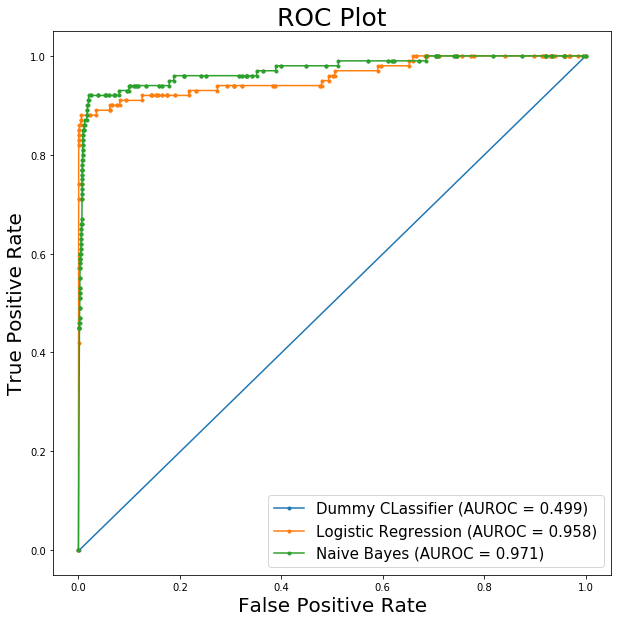

In [71]:
#Plotting Data
fig = plt.figure(figsize=(10,10))
plt.plot(dc_fp, dc_tp, marker='.', label='Dummy CLassifier (AUROC = %0.3f)' % dc_auc)
plt.plot(lr_fp, lr_tp, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(nb_fp, nb_tp, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)


# Title
plt.title('ROC Plot', fontsize = 25)
# Axis labels
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
# Show legend
plt.legend(fontsize = 15)
# Show plot
plt.show()